In [1]:
import pandas as pd
import numpy as np

In [79]:
df1 = pd.read_csv('price.csv',header=0,index_col=0)

In [80]:
df1 = df1[['price','건축년도','주차대수','범죄율','건물연식','대규모점포_거리','버스정류장_거리','지하철역_거리','학교_거리','유치원_거리','병원_거리','주택구매력지수','RIR','LIR','area']]

In [81]:
values = df1.values

In [82]:
values.shape

(37, 15)

In [83]:
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [84]:
values = values.astype('float32')

In [85]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

In [86]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
  n_vars = 1 if type(data) is list else data.shape[1]
  df = pd.DataFrame(data)
  cols, names = list(), list()
  # input sequence (t-n, ... t-1)
  for i in range(n_in, 0, -1):
      cols.append(df.shift(i))
      names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
  # forecast sequence (t, t+1, ... t+n)
  for i in range(0, n_out):
      cols.append(df.shift(-i))
      if i == 0:
          names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
      else:
          names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
  # put it all together
  agg = pd.concat(cols, axis=1)
  agg.columns = names
  # drop rows with NaN values
  if dropnan:
      agg.dropna(inplace=True)
  return agg

In [87]:
reframed = series_to_supervised(values, 3, 1)

In [88]:
reframed

,var1(t-3),var2(t-3),var3(t-3),var4(t-3),var5(t-3),var6(t-3),var7(t-3),var8(t-3),var9(t-3),var10(t-3),...,var6(t),var7(t),var8(t),var9(t),var10(t),var11(t),var12(t),var13(t),var14(t),var15(t)
3,66200.000000,2012.0,221.0,2.59041,4.0,0.056426,0.113172,0.231107,0.126888,0.367897,...,0.056426,0.113172,0.231107,0.126888,0.367897,0.175818,62.625675,7.26,3.64,85.0
4,64300.000000,2012.0,221.0,2.59041,4.0,0.056426,0.113172,0.231107,0.126888,0.367897,...,0.056426,0.113172,0.231107,0.126888,0.367897,0.175818,65.001442,6.73,3.36,85.0
5,53166.667969,2012.0,221.0,2.59041,4.0,0.056426,0.113172,0.231107,0.126888,0.367897,...,0.056426,0.113172,0.231107,0.126888,0.367897,0.175818,64.428070,6.49,3.26,85.0
6,52500.000000,2012.0,221.0,2.59041,4.0,0.056426,0.113172,0.231107,0.126888,0.367897,...,0.056426,0.113172,0.231107,0.126888,0.367897,0.175818,64.615204,6.41,3.14,85.0
7,53000.000000,2012.0,221.0,2.59041,4.0,0.056426,0.113172,0.231107,0.126888,0.367897,...,0.056426,0.113172,0.231107,0.126888,0.367897,0.175818,64.767021,6.82,3.13,85.0
8,57500.000000,2012.0,221.0,2.59041,4.0,0.056426,0.113172,0.231107,0.126888,0.367897,...,0.056426,0.113172,0.231107,0.126888,0.367897,0.175818,66.227448,6.51,2.70,85.0
9,59000.000000,2012.0,221.0,2.59041,4.0,0.056426,0.113172,0.231107,0.126888,0.367897,...,0.056426,0.113172,0.231107,0.126888,0.367897,0.175818,67.882683,7.38,2.86,85.0
10,53900.000000,2012.0,221.0,2.59041,4.0,0.056426,0.113172,0.231107,0.126888,0.367897,...,0.056426,0.113172,0.231107,0.126888,0.367897,0.175818,68.545532,6.69,2.74,85.0
11,58000.000000,2012.0,221.0,2.59041,4.0,0.056426,0.113172,0.231107,0.126888,0.367897,...,0.056426,0.113172,0.231107,0.126888,0.367897,0.175818,68.473755,6.62,2.76,85.0
12,56500.000000,2012.0,221.0,2.59041,4.0,0.056426,0.113172,0.231107,0.126888,0.367897,...,0.056426,0.113172,0.231107,0.126888,0.367897,0.175818,69.803856,6.49,2.84,85.0


34 * 60 = n-1 * 2m
35*30=n*m

In [89]:
reframed.columns[46:60]

Index(['var2(t)', 'var3(t)', 'var4(t)', 'var5(t)', 'var6(t)', 'var7(t)',
       'var8(t)', 'var9(t)', 'var10(t)', 'var11(t)', 'var12(t)', 'var13(t)',
       'var14(t)', 'var15(t)'],
      dtype='object')

In [90]:
reframed.drop(reframed.columns[46:60], axis=1, inplace=True)
reframed.drop(reframed.columns[16:30], axis=1, inplace=True)
reframed.drop(reframed.columns[1:15], axis=1, inplace=True)

In [91]:
reframed

,var1(t-3),var1(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var12(t-1),var13(t-1),var14(t-1),var15(t-1),var1(t)
3,66200.000000,64300.000000,53166.667969,2012.0,221.0,2.59041,4.0,0.056426,0.113172,0.231107,0.126888,0.367897,0.175818,62.214539,7.52,3.69,85.0,52500.000000
4,64300.000000,53166.667969,52500.000000,2012.0,221.0,2.59041,4.0,0.056426,0.113172,0.231107,0.126888,0.367897,0.175818,62.625675,7.26,3.64,85.0,53000.000000
5,53166.667969,52500.000000,53000.000000,2012.0,221.0,2.59041,4.0,0.056426,0.113172,0.231107,0.126888,0.367897,0.175818,65.001442,6.73,3.36,85.0,57500.000000
6,52500.000000,53000.000000,57500.000000,2012.0,221.0,2.59041,4.0,0.056426,0.113172,0.231107,0.126888,0.367897,0.175818,64.428070,6.49,3.26,85.0,59000.000000
7,53000.000000,57500.000000,59000.000000,2012.0,221.0,2.59041,4.0,0.056426,0.113172,0.231107,0.126888,0.367897,0.175818,64.615204,6.41,3.14,85.0,53900.000000
8,57500.000000,59000.000000,53900.000000,2012.0,221.0,2.59041,4.0,0.056426,0.113172,0.231107,0.126888,0.367897,0.175818,64.767021,6.82,3.13,85.0,58000.000000
9,59000.000000,53900.000000,58000.000000,2012.0,221.0,2.59041,4.0,0.056426,0.113172,0.231107,0.126888,0.367897,0.175818,66.227448,6.51,2.70,85.0,56500.000000
10,53900.000000,58000.000000,56500.000000,2012.0,221.0,2.59041,4.0,0.056426,0.113172,0.231107,0.126888,0.367897,0.175818,67.882683,7.38,2.86,85.0,55000.000000
11,58000.000000,56500.000000,55000.000000,2012.0,221.0,2.59041,4.0,0.056426,0.113172,0.231107,0.126888,0.367897,0.175818,68.545532,6.69,2.74,85.0,55000.000000
12,56500.000000,55000.000000,55000.000000,2012.0,221.0,2.59041,4.0,0.056426,0.113172,0.231107,0.126888,0.367897,0.175818,68.473755,6.62,2.76,85.0,62500.000000


In [92]:
values=reframed.values

In [93]:
values

array([[6.62000000e+04, 6.43000000e+04, 5.31666680e+04, 2.01200000e+03,
        2.21000000e+02, 2.59040999e+00, 4.00000000e+00, 5.64261079e-02,
        1.13171645e-01, 2.31107339e-01, 1.26888365e-01, 3.67897481e-01,
        1.75817907e-01, 6.22145386e+01, 7.51999998e+00, 3.69000006e+00,
        8.50000000e+01, 5.25000000e+04],
       [6.43000000e+04, 5.31666680e+04, 5.25000000e+04, 2.01200000e+03,
        2.21000000e+02, 2.59040999e+00, 4.00000000e+00, 5.64261079e-02,
        1.13171645e-01, 2.31107339e-01, 1.26888365e-01, 3.67897481e-01,
        1.75817907e-01, 6.26256752e+01, 7.26000023e+00, 3.64000010e+00,
        8.50000000e+01, 5.30000000e+04],
       [5.31666680e+04, 5.25000000e+04, 5.30000000e+04, 2.01200000e+03,
        2.21000000e+02, 2.59040999e+00, 4.00000000e+00, 5.64261079e-02,
        1.13171645e-01, 2.31107339e-01, 1.26888365e-01, 3.67897481e-01,
        1.75817907e-01, 6.50014420e+01, 6.73000002e+00, 3.35999990e+00,
        8.50000000e+01, 5.75000000e+04],
       [5.250

In [94]:
scaled = scaler.fit_transform(values)

In [100]:
values = scaled
n_train_hours =  24 #테스트 데이터 얼마나 사용할 건지
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [110]:
values.shape

(34, 18)

In [103]:
train_y

array([0.        , 0.00465116, 0.04651165, 0.0604651 , 0.01302326,
       0.05116278, 0.03720927, 0.02325583, 0.02325583, 0.09302324,
       0.08682168, 0.11534882, 0.11627907, 0.09488374, 0.14418602,
       0.08139533, 0.0933333 , 0.11860466, 0.12372094, 0.16279072,
       0.16744184, 0.14744186, 0.18139535, 0.1727907 ], dtype=float32)

In [104]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow import keras
import numpy as np
from numpy import concatenate

In [105]:
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(train_X, train_y, epochs=50, batch_size=72,validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/50
1/1 - 3s - loss: 0.0822 - val_loss: 0.4107 - 3s/epoch - 3s/step
Epoch 2/50
1/1 - 0s - loss: 0.0738 - val_loss: 0.4006 - 35ms/epoch - 35ms/step
Epoch 3/50
1/1 - 0s - loss: 0.0672 - val_loss: 0.3909 - 41ms/epoch - 41ms/step
Epoch 4/50
1/1 - 0s - loss: 0.0621 - val_loss: 0.3814 - 65ms/epoch - 65ms/step
Epoch 5/50
1/1 - 0s - loss: 0.0581 - val_loss: 0.3721 - 65ms/epoch - 65ms/step
Epoch 6/50
1/1 - 0s - loss: 0.0541 - val_loss: 0.3629 - 70ms/epoch - 70ms/step
Epoch 7/50
1/1 - 0s - loss: 0.0503 - val_loss: 0.3538 - 69ms/epoch - 69ms/step
Epoch 8/50
1/1 - 0s - loss: 0.0468 - val_loss: 0.3447 - 53ms/epoch - 53ms/step
Epoch 9/50
1/1 - 0s - loss: 0.0439 - val_loss: 0.3358 - 55ms/epoch - 55ms/step
Epoch 10/50
1/1 - 0s - loss: 0.0415 - val_loss: 0.3273 - 52ms/epoch - 52ms/step
Epoch 11/50
1/1 - 0s - loss: 0.0402 - val_loss: 0.3195 - 62ms/epoch - 62ms/step
Epoch 12/50
1/1 - 0s - loss: 0.0401 - val_loss: 0.3124 - 66ms/epoch - 66ms/step
Epoch 13/50
1/1 - 0s - loss: 0.0406 - val_loss: 0.306

In [106]:
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

1/1 [==============================] - 1s 576ms/step


In [118]:
inv_yhat = concatenate((yhat, test_X[:, :]), axis=1)

In [121]:
yhat

array([[0.10618285],
       [0.10249887],
       [0.12166858],
       [0.11805727],
       [0.11759601],
       [0.12096173],
       [0.150011  ],
       [0.18555558],
       [0.23912716],
       [0.22904329]], dtype=float32)

In [122]:
test_X

array([[0.30363977, 0.37356317, 0.20081079, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.44045854, 0.69105697,
        0.50282466, 0.        ],
       [0.37356317, 0.35584295, 0.17513508, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.50321007, 0.9552846 ,
        0.5988699 , 0.        ],
       [0.35584295, 0.31034482, 0.18810809, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.46966434, 0.4227643 ,
        0.35593212, 0.        ],
       [0.31034482, 0.33333337, 0.18687254, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.44761157, 0.43495917,
        0.33333325, 0.        ],
       [0.33333337, 0.33114386, 0.254054  , 0.      

In [113]:
inv_yhat

array([[0.10618285, 0.37356317, 0.20081079, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.44045854, 0.69105697,
        0.50282466, 0.        ],
       [0.10249887, 0.35584295, 0.17513508, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.50321007, 0.9552846 ,
        0.5988699 , 0.        ],
       [0.12166858, 0.31034482, 0.18810809, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.46966434, 0.4227643 ,
        0.35593212, 0.        ],
       [0.11805727, 0.33333337, 0.18687254, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.44761157, 0.43495917,
        0.33333325, 0.        ],
       [0.11759601, 0.33114386, 0.254054  , 0.      

In [123]:
inv_yhat = scaler.inverse_transform(inv_yhat)

In [124]:
inv_yhat = inv_yhat[:,0]

In [125]:
inv_yhat

array([58042.746, 57850.445, 58851.1  , 58662.59 , 58638.516, 58814.207,
       60330.574, 62186.004, 64982.438, 64456.06 ], dtype=float32)

In [126]:
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 0:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [127]:
inv_y

array([ 60366.414,  60949.117,  60893.617,  63911.164,  62939.996,
        77847.35 ,  73825.11 ,  74674.88 ,  97416.27 , 104700.01 ],
      dtype=float32)

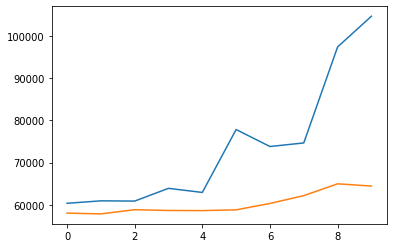

In [129]:
import matplotlib.pyplot as plt
plt.plot(inv_y)
plt.plot(inv_yhat)
plt.show()